# Fundamentos de Data Science
Analisis de **Salarios en Ciencia de Datos** en 2023

### Requisitos
Se debe limpiar y explorar un dataset que contiene información sobre los salarios en el campo de la ciencia de datos para el año 2023. El análisis ayuda a entender las tendencias salariales y los factores que influyen en las diferencias de salarios en esta industria.

### Dataset
Data Science Salaries 2023 - Salaries of Different Data Science Fields in the Data Science Domain

**Data Science Job Salaries Dataset contains 11 columns, each are:**

**work_year:** The year the salary was paid.<br>

**experience_level:**  The experience level in the job during the year with the following possible values:<br>
* EN: Entry-level / Junior
* MI: Mid-level / Intermediate
* SE: Senior-level / Expert
* EX: Executive-level / Director<br>

**employment_type:** The type of employement for the role:<br>
* PT: Part-time
* FT: Full-time
* CT: Contract
* FL: Freelance<br>

**job_title:** The role worked in during the year.<br>

**salary:** The total gross salary amount paid.<br>

**salary_currency:** The currency of the salary paid as an ISO 4217 currency code.<br>

**salary_in_usd:** The salary in USD (FX rate divided by avg. USD rate of respective year) via statistical data from the BIS and central banks.<br>

**employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.<br>

**remote_ratio:** The overall amount of work done remotely, possible values are as follows:<br>
* 0: No remote work (less than 20%)
* 50: Partially remote/hybird
* 100: Fully remote (more than 80%)<br>

**company_location:** The country of the employer's main office or contracting branch as an ISO 3166 country code.<br>

**company_size:** The average number of people that worked for the company during the year:<br>
* S: less than 50 employees (small)
* M: 50 to 250 employees (medium)
* L: more than 250 employees (large)<br>

Dataset: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023
Dictionary: https://aijobs.net/salaries/download/

### Carga y Visualizacion de datos
* Se importa las librerias necesarias para el analisis del dataset
* Se carga del dataset (archivo .csv) 
* Se visualiza la cantidad d registros y columnas
* Se muestran los primeros 5 registros 

In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset
path = r'C:\Users\romi_\repositorios\Examen_de_Certificacion-Version_C\data\ds_salaries.csv'
df = pd.read_csv(path)
# Imprime la forma del dataset (registros, columnas)
print(df.shape)
# Muestra los 5 primeros registros del dataset
df.head()

(3755, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Limpieza de datos con Python
* **Detección y eliminación de valores duplicados:** Asegúrate de que cada registro en el dataset sea único.
* **Verificación y ajuste de tipos de datos:** Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* **Consistencia en valores categóricos:** Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’).
* **Manejo de valores faltantes:** Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
* **Detección de datos anómalos:** Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

In [3]:
# Eliminar registros duplicados
df.drop_duplicates(inplace=True)

# Verificar el número de registros después de eliminar duplicados
print(f"Número de registros después de eliminar duplicados: {df.shape[0]}")


Número de registros después de eliminar duplicados: 2584


#### Se realiza un analisis por columnas

**work_year:** como se esta realizando un analisis teniendo en cuenta solo el año 2023, solo requiero registros de ese año en particular.<br>

In [4]:
# Verificar los valores únicos para conocer los valores unicos y entender que se debe hacer
print("Valores unicos:", df['work_year'].unique())

Valores unicos: [2023 2022 2020 2021]


In [5]:
# Filtrar por el año 2023
df_filtered = df[df['work_year'] == 2023]
# Verificar los valores únicos luego del analisis
print("Valores unicos:", df_filtered['work_year'].unique())
print(df_filtered.shape)

Valores unicos: [2023]
(1156, 11)


**experience_level:** se debe ver que los valores sean EN, MI, SE, EX. Cualquier otro valor es inválido.<br>
Luego del analisis, se determina que no es necesaria ninguna accion

In [6]:
# Verificar valores únicos
print("Valores unicos:", df_filtered['experience_level'].unique())

# Verificar si hay valores nulos
print("Cantidad de valores nulos:", df_filtered['experience_level'].isnull().sum())

print(df_filtered.shape)


Valores unicos: ['SE' 'MI' 'EN' 'EX']
Cantidad de valores nulos: 0
(1156, 11)


**employment_type:** se debe ver que los valores sean PT, FT, CT, FL. Cualquier otro valor es inválido.<br>
Luego del analisis, se determina que no es necesaria ninguna accion

In [7]:
# Verificar valores únicos
print("Valores unicos:", df_filtered['employment_type'].unique())

# Verificar si hay valores nulos
print("Cantidad de valores nulos:", df_filtered['employment_type'].isnull().sum())

print(df_filtered.shape)


Valores unicos: ['FT' 'CT' 'FL' 'PT']
Cantidad de valores nulos: 0
(1156, 11)


**job_title:** descripcion del titulo de trabajo otorgado por las correspodientes empresas, dado segun necesidad. De manera unilateral se determina que es posible llegar a agrupar los titulos segun algun criterio, pero se toma la determinacion de dejar la descripcion tal y como se asigno debido a que no se cuentan con los criterios de agrupación.<br>
Luego del analisis, se determina que no es necesaria ninguna accion

In [8]:
# Verificar valores únicos
print("Valores unicos:", df_filtered['job_title'].unique())

# Verificar si hay valores nulos
print("Cantidad de valores nulos:", df_filtered['job_title'].isnull().sum())

print(df_filtered.shape)

Valores unicos: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'ETL Engineer' 'Data DevOps Engineer' 'AI Developer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Cloud Database Engineer' 'Financial Data Analyst'
 'Data Infrastructure Engineer' 'Software Data Engineer' 'AI Programmer'
 'Data 

**salary:** determinar que los valores sean de tipo numerico y que no se tengan valores nulos

In [9]:
# Verificar valores únicos
print("Valores unicos:", df_filtered['salary'].unique())

# Verificar si hay valores nulos
print("Cantidad de valores nulos:", df_filtered['salary'].isnull().sum())

# Asegurarse de que la columna salary sea de tipo numérico usando .loc[]
df_filtered.loc[:, 'salary'] = pd.to_numeric(df_filtered['salary'], errors='coerce')

print(df_filtered.shape)

Valores unicos: [  80000   30000   25500  175000  120000  222200  136000  219000  141000
  147100   90700  130000  100000  213660  130760  170000  150000  110000
  275000  174000  230000  143200  225000  156400  200000   90000   72000
  253200  342810  184590  162500  105380   64500  204620  110680  270703
  221484  212750  185000  262000  245000  275300  183500  218500  199098
  203300  123600  189110  139000  258750  231500  166000  172500  110500
  238000  176000  237000  201450  309400  159100  115000   81500  280000
  210000  280100  168100  193500  510000   65000  185900  129300  140000
   45000   36000  105000   70000  163196  145885  217000  202800  104300
  145000  165000  132300  179170   94300  152500  116450  247300  133800
  203000  133000  220000  289800  214000  179820  143860  283200  188800
  214200  252000  129000  155000  161800  141600  342300  176100   85000
  138784   83270   75000  204500  138900  318300  212200   95000  195000
  160000 1700000   38000   35000  1

**salary_currency:** se debe ver que los valores correspondientes al ISO 4217 currency code. Cualquier otro valor es inválido.<br>
Luego del analisis, se determina que no es necesaria ninguna accion

In [10]:
# Verificar valores únicos
print("Valores unicos:", df_filtered['salary_currency'].unique())

# Verificar si hay valores nulos
print("Cantidad de valores nulos:", df_filtered['salary_currency'].isnull().sum())

print(df_filtered.shape)

Valores unicos: ['EUR' 'USD' 'HKD' 'INR' 'GBP' 'AUD' 'SGD' 'CAD' 'ILS' 'CHF' 'THB' 'PLN'
 'BRL']
Cantidad de valores nulos: 0
(1156, 11)


**salary_in_usd:** determinar que los valores sean de tipo numerico y que no se tengan valores nulos

In [11]:
# Verificar valores únicos
print("Valores unicos:", df_filtered['salary_in_usd'].unique())

# Verificar si hay valores nulos
print("Cantidad de valores nulos:", df_filtered['salary_in_usd'].isnull().sum())

# Asegurarse de que la columna salary sea de tipo numérico usando .loc[]
df_filtered.loc[:, 'salary'] = pd.to_numeric(df_filtered['salary_in_usd'], errors='coerce')

print(df_filtered.shape)

Valores unicos: [ 85847  30000  25500 175000 120000 222200 136000 219000 141000 147100
  90700 130000 100000 213660 130760 170000 150000 110000 275000 174000
 230000 143200 225000 156400 200000  90000  72000 253200 342810 184590
 162500 105380  64500 204620 110680 270703 221484 212750 185000 262000
 245000 275300 183500 218500 199098 203300 123600 189110 139000 258750
 231500 166000 172500 110500 238000 176000 237000 201450 309400 159100
 115000  81500 280000 210000 280100 168100 193500  65062  69751  96578
 185900 129300 140000  48289  38631 105000  70000 163196 145885 217000
 202800 104300 145000  65000 165000 132300 179170  94300 152500 116450
 247300 133800 203000 133000 220000 289800 214000 179820 143860 283200
 188800 214200 252000 129000 155000 161800 141600 342300 176100  85000
 138784  83270  75000 204500 138900 318300 212200  95000 195000 160000
  20670  46178  42533 168400 105200 190000  54685 241000  66837  85066
  57723 300000 250000 228000 186000 180000  53654 205000 2150

**employee_residence:** se debe ver que los valores correspondientes al ISO 3166 country code. Cualquier otro valor es inválido.<br>
Luego del analisis, se determina que no es necesaria ninguna accion

In [12]:
# Verificar valores únicos
print("Valores unicos:", df_filtered['employee_residence'].unique())

# Verificar si hay valores nulos
print("Cantidad de valores nulos:", df_filtered['employee_residence'].isnull().sum())

print(df_filtered.shape)

Valores unicos: ['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'HK' 'PT' 'IN' 'NL' 'CF' 'FR' 'AU' 'FI'
 'UA' 'IE' 'IL' 'GH' 'CH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'TH' 'HR'
 'PL' 'BR' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'LV' 'RO']
Cantidad de valores nulos: 0
(1156, 11)


**remote_ratio:** se debe ver que los valores sean PT, FT, CT, FL. Cualquier otro valor es inválido.<br>
Luego del analisis, se determina que no es necesaria ninguna accion

In [13]:
# Verificar valores únicos
print("Valores unicos:", df_filtered['remote_ratio'].unique())

# Verificar si hay valores nulos
print("Cantidad de valores nulos:", df_filtered['remote_ratio'].isnull().sum())

print(df_filtered.shape)

Valores unicos: [100   0  50]
Cantidad de valores nulos: 0
(1156, 11)


**company_location:** se debe ver que los valores correspondientes al ISO 4217 currency code. Cualquier otro valor es inválido.<br>
Luego del analisis, se determina que no es necesaria ninguna accion

In [14]:
# Verificar valores únicos
print("Valores unicos:", df_filtered['company_location'].unique())

# Verificar si hay valores nulos
print("Cantidad de valores nulos:", df_filtered['company_location'].isnull().sum())

print(df_filtered.shape)

Valores unicos: ['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'HK' 'NL' 'IN' 'CF' 'FR' 'FI' 'UA' 'IE'
 'IL' 'GH' 'CH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'PT' 'TH' 'HR' 'BR' 'VN'
 'EE' 'AM' 'BA' 'KE' 'GR' 'LV' 'RO']
Cantidad de valores nulos: 0
(1156, 11)


**company_size** se debe ver que los valores sean S, M, L. Cualquier otro valor es inválido.<br>
Luego del analisis, se determina que no es necesaria ninguna accion

In [15]:
# Verificar valores únicos
print("Valores unicos:", df_filtered['company_size'].unique())

# Verificar si hay valores nulos
print("Cantidad de valores nulos:", df_filtered['company_size'].isnull().sum())

print(df_filtered.shape)

Valores unicos: ['L' 'S' 'M']
Cantidad de valores nulos: 0
(1156, 11)


### Exploración de datos con Python:

#### **Visualizaciones exploratorias univariadas:** Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

1. **Histograma de salarios**<br>
El histograma muestra cómo se distribuyen los salarios en USD.<br> 
La distribución de los salarios parece ser asimétrica positiva (desplazada hacia la derecha). Esto significa que la mayoría de las personas ganan salarios más bajos, mientras que un número menor de personas gana salarios muy altos.<br>
La mayor concentración de salarios se encuentra entre los 100,000 y 200,000 dólares. Es decir, la mayoría de las personas encuestadas ganan un salario dentro de este rango.
Podemos inferir que existen algunos salarios muy altos (por encima de los 300,000 dólares) que podrían considerarse como valores atípicos.
Rango salarial: El rango salarial total es bastante amplio, desde cerca de 0 dólares hasta más de 400,000 dólares.

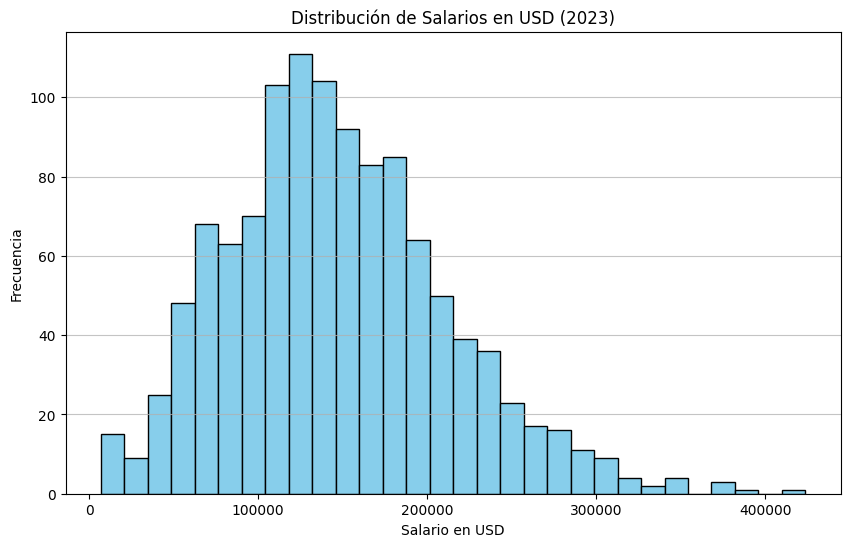

In [16]:
# Histograma de salarios
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['salary_in_usd'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Salarios en USD (2023)')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

2. **Gráfico de Caja (Boxplot) de Salarios**<br> 
La mayoría de los salarios se encuentran entre 100,000 y 200,000 USD.<br>
Existe una considerable dispersión en los datos, ya que hay salarios que se encuentran muy por encima de la mediana.<br>
La presencia de varios valores atípicos sugiere que hay algunos individuos con salarios significativamente más altos que el resto.

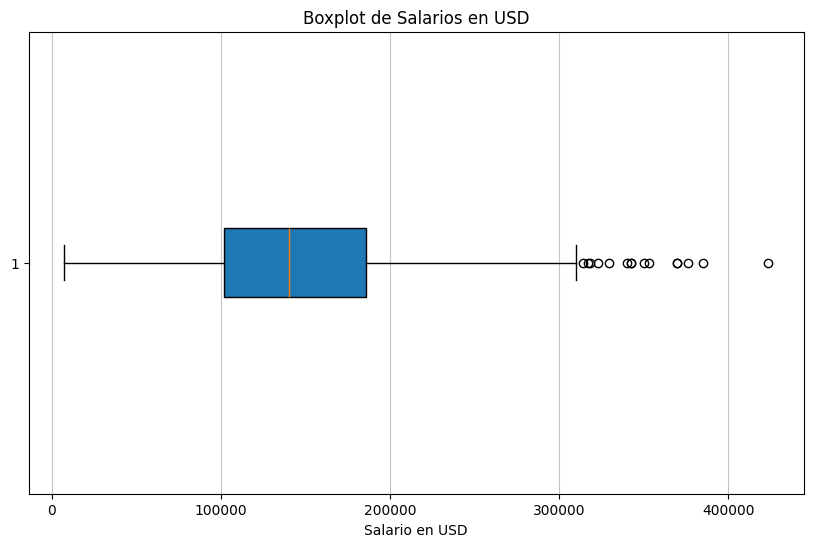

In [21]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_filtered['salary_in_usd'], vert=False, patch_artist=True)
plt.title('Boxplot de Salarios en USD')
plt.xlabel('Salario en USD')
plt.grid(axis='x', alpha=0.75)
plt.show()

3. **Gráfico de barras del nivel de experiencia**<br>
* Este gráfico de barras muestra la cantidad de empleos por nivel de experiencia.<br> 
* El nivel de experiencia "SE" es el más predominante en el conjunto de datos. Esto indica que la mayoría de los individuos o empleos analizados corresponden a perfiles con una experiencia alta o avanzada.
* La distribución de los datos es claramente asimétrica, con una concentración hacia la derecha. Esto significa que la mayoría de los datos se encuentran en la parte superior del rango de experiencia.

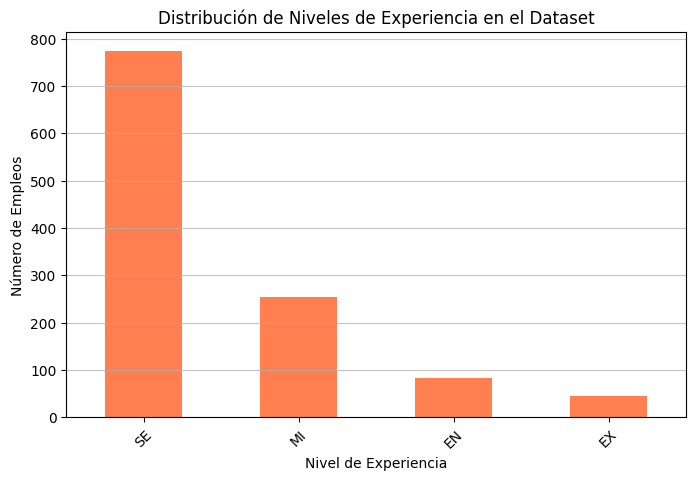

In [17]:
# Gráfico de barras para niveles de experiencia
experience_counts = df_filtered['experience_level'].value_counts()

plt.figure(figsize=(8, 5))
experience_counts.plot(kind='bar', color='coral')
plt.title('Distribución de Niveles de Experiencia en el Dataset')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Número de Empleos')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

#### **Visualizaciones exploratorias multivariadas:** Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

1. **Diagrama de dispersión: Salario vs. Ratio de trabajo remoto**<br>
* Este gráfico de dispersión muestra la relación entre el salario y el ratio de trabajo remoto.<br> 
* A simple vista, no se aprecia una relación lineal clara entre el salario y el ratio de trabajo remoto. Es decir, no podemos afirmar que a mayor porcentaje de trabajo remoto, mayor sea el salario, ni viceversa.
* La mayoría de los datos se concentran en dos grupos principales: uno con un ratio de trabajo remoto cercano a 0% y otro con un ratio cercano al 100%. Esto sugiere que existen dos grandes grupos de personas en este conjunto de datos: aquellos que trabajan principalmente de forma presencial y aquellos que trabajan principalmente de forma remota.
* Se observa un punto aislado con un salario significativamente más alto y un porcentaje de trabajo remoto intermedio. Este punto podría considerarse un valor atípico y podría influir en el análisis si no se tiene en cuenta su posible naturaleza excepcional.

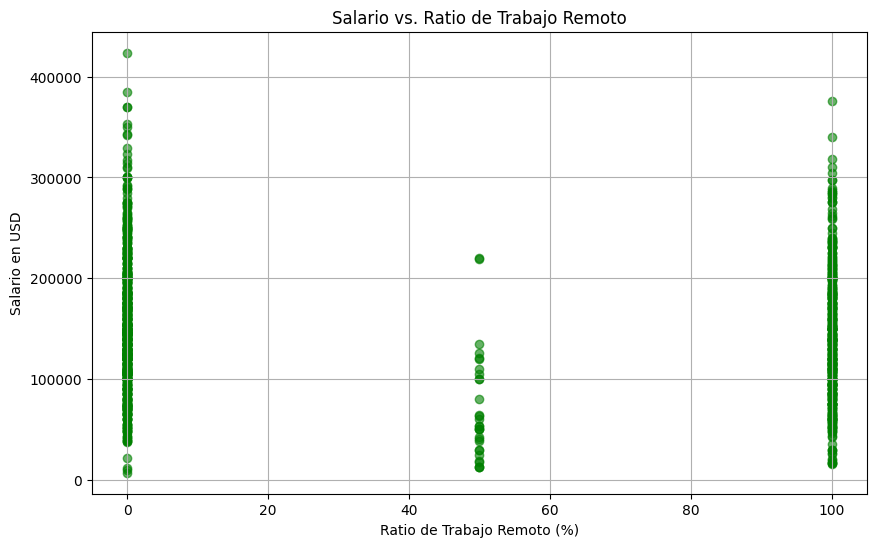

In [18]:
# Diagrama de dispersión: Salario vs. Ratio de trabajo remoto
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['remote_ratio'], df_filtered['salary_in_usd'], alpha=0.6, color='green')
plt.title('Salario vs. Ratio de Trabajo Remoto')
plt.xlabel('Ratio de Trabajo Remoto (%)')
plt.ylabel('Salario en USD')
plt.grid()
plt.show()

2. **Boxplot de salarios por tipo de empleo**<br>
Este boxplot ilustra la distribución de salarios según el tipo de empleo.<br> 
* Claramente, existe una gran desigualdad salarial entre los diferentes tipos de empleo. El tipo de empleo "FT" (tiempo completo) presenta los salarios más altos, tanto en términos de mediana como de valores máximos.
* La longitud de las cajas y los bigotes nos indica la variabilidad de los salarios dentro de cada tipo de empleo. Por ejemplo, el tipo de empleo "FT" muestra una mayor dispersión de salarios en comparación con los otros tipos.
* La presencia de valores atípicos en algunos tipos de empleo sugiere que existen algunos puestos de trabajo con salarios excepcionalmente altos o bajos.

<Figure size 1000x600 with 0 Axes>

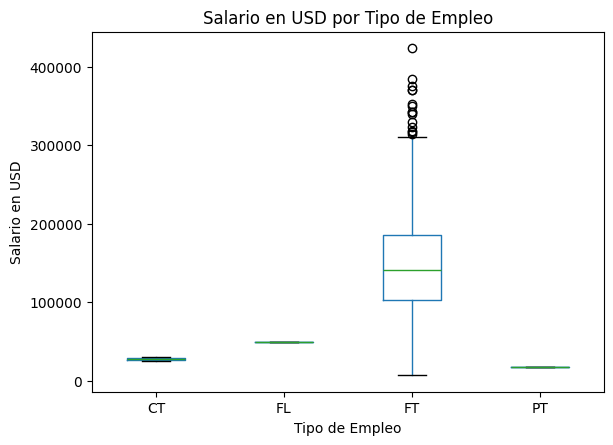

In [19]:
# Boxplot de salarios por tipo de empleo
plt.figure(figsize=(10, 6))
df_filtered.boxplot(column='salary_in_usd', by='employment_type', grid=False)
plt.title('Salario en USD por Tipo de Empleo')
plt.suptitle('')
plt.xlabel('Tipo de Empleo')
plt.ylabel('Salario en USD')
plt.show()

3. **Gráfico de Cajas por Niveles de Experiencia** 
* En general, podemos observar una tendencia al alza en los salarios a medida que aumenta el nivel de experiencia. Los niveles "SE" y "MI" presentan medianas salariales más altas en comparación con "EN" y "EX".
* La longitud de las cajas y los bigotes nos indica la variabilidad de los salarios dentro de cada nivel de experiencia. Por ejemplo, el nivel "SE" muestra una mayor dispersión de salarios en comparación con el nivel "EN".
* La presencia de valores atípicos en todos los niveles de experiencia sugiere que existen algunos individuos con salarios excepcionalmente altos o bajos, independientemente de su nivel de experiencia.

<Figure size 1200x600 with 0 Axes>

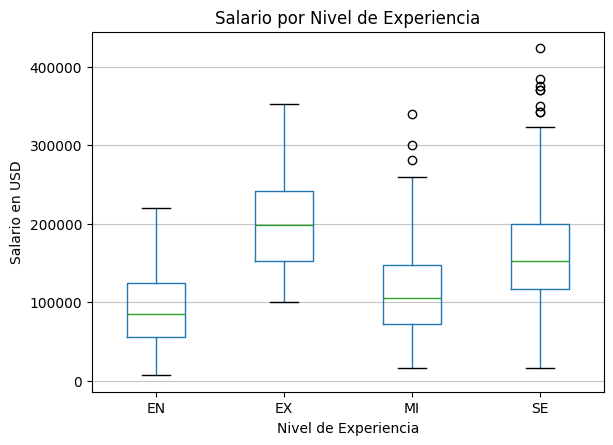

In [22]:
plt.figure(figsize=(12, 6))
df_filtered.boxplot(column='salary_in_usd', by='experience_level', grid=False)
plt.title('Salario por Nivel de Experiencia')
plt.suptitle('')  # Eliminar el título adicional
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario en USD')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Análisis adicional:
* **Estadísticas descriptivas:** Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
* **Identificación de tendencias:** Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

In [20]:
# Estadísticas descriptivas
summary_stats = df_filtered[['salary_in_usd', 'remote_ratio']].describe()
print(summary_stats)


       salary_in_usd  remote_ratio
count    1156.000000   1156.000000
mean   146998.227509     38.235294
std     65076.343643     47.944773
min      7000.000000      0.000000
25%    101985.750000      0.000000
50%    140000.000000      0.000000
75%    185900.000000    100.000000
max    423834.000000    100.000000


### Interpretación

* **Count:** Ambos campos tienen 1,156 registros, lo que indica que no hay valores nulos en estas columnas.
* **Mean (Media):** El salario promedio es de $146,998.23, lo que sugiere que los trabajos en ciencia de datos son generalmente bien remunerados. El ratio de trabajo remoto promedio es del 38.24%, lo que indica que, en promedio, los empleados pasan una parte significativa de su tiempo trabajando de forma remota.
* **Standard Deviation (Desviación Estándar):** La alta desviación estándar de $65,076.34 en los salarios sugiere que hay una amplia variabilidad en los salarios, lo que podría indicar la existencia de posiciones muy bien pagadas en comparación con algunas que son significativamente más bajas. La desviación estándar del 47.94% en el ratio de trabajo remoto también sugiere que hay una diversidad considerable en las políticas de trabajo remoto entre las diferentes posiciones.
* **Min (Mínimo):** El salario más bajo registrado es $7,000, lo que puede indicar trabajos de medio tiempo o de entrada que no son representativos del campo general.
El ratio mínimo de trabajo remoto es 0.00%, lo que sugiere que algunos empleados no tienen la opción de trabajar desde casa.
* **25th Percentile:** El primer cuartil (Q1) de los salarios es $101,985.75, lo que indica que el 25% de los empleos en el dataset pagan menos que esta cantidad.
El Q1 del ratio de trabajo remoto es 0.00%, lo que significa que una cuarta parte de los empleados no trabaja de forma remota.
* **Median (Mediana):** La mediana del salario es $140,000, lo que sugiere que la mitad de los empleados ganan menos de esta cantidad y la otra mitad más.
La mediana del ratio de trabajo remoto es 0.00%, indicando que la mitad de los empleos no permite trabajo remoto.
* **75th Percentile:** El tercer cuartil (Q3) de los salarios es $185,900, lo que muestra que el 75% de los empleos tienen salarios por debajo de este valor.
El Q3 del ratio de trabajo remoto es 100.00%, indicando que una parte significativa de los empleos permite trabajar de forma completamente remota.
* **Max (Máximo):** El salario más alto registrado es $423,834, que puede representar un rol muy especializado o en una empresa muy bien remunerada.
El ratio de trabajo remoto máximo es 100.00%, lo que indica que hay roles que permiten a los empleados trabajar de forma completamente remota.


### Identificación de Tendencias
La variabilidad en los salarios y el ratio de trabajo remoto indica que las condiciones laborales y la compensación en el campo de la ciencia de datos pueden diferir significativamente según el rol, la experiencia y la empresa.<br>
La mayoría de los trabajos parecen tener una opción limitada de trabajo remoto, ya que la mediana y el primer cuartil del ratio de trabajo remoto son 0.00%. Esto podría ser un área de interés para futuras investigaciones o recomendaciones de política laboral.


### Entrega
* Un archivo .ipynb claramente comentado con todo el código utilizado para la limpieza y exploración de datos. Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 4 visualizaciones.
* Subir un repositorio a una plataforma de control de versiones (por ejemplo, GitHub) con un TAG incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.
* **NOTA:** Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.

### Notas
* Para evitar que otros estudiantes copien tu trabajo, asegúrate de que el código no esté guardado en un repositorio público.
Para minimizar la deducción de puntos, asegúrate de cargar los requisitos completos.
* Si tienes problemas para cargar archivos en la aplicación de exámenes, por favor NO desbloquees otro examen. Envía el archivo por correo electrónico a tu instructor.
* Puedes usar cualquier recurso que tengas disponible (notas de clase, Google, Stackoverflow, etc.) – PERO DEBES CITAR CUALQUIER FUENTE UTILIZADA. Puedes citar fuentes en forma de comentario de código o una celda de texto con enlaces a cualquier recurso que hayas utilizado. La falta de citas será considerada plagio y resultará en la falla del examen.
* No puedes recibir ayuda de ninguna otra persona en este código. Esto incluye compañeros de clase, exalumnos, tu instructor, etc. La colaboración con otra persona en este examen será considerada plagio y resultará en la falla del examen y puede resultar en la expulsión del programa.
* Se permite el uso de LLM (Copilot, GPT, etc.), pero solo como guía o para depuración. Se espera que los estudiantes pongan su máximo esfuerzo.